1.	Definitions:  
- I.	Sample1:  09/30/2012 to 09/30/2016 
- II.	WFLY: 3Y*w1 – 5Y + 7Y*w2, weights = (w1, -1, w2) . 


2a.	Download a panel of CMT rates into pandas data frame & remove ‘1M column from the dataset

In [310]:
import pandas as pd
import requests
import numpy as np

def get_treasury_yield_data(api_endpoint, api_params):
    """
    Retrieves Treasury Yield Curve data from the Quandl API and returns a Pandas DataFrame.

    Parameters:
    api_endpoint (str): API endpoint for Treasury Yield Curve data
    api_params (dict): Dictionary containing parameters for API request

    Returns:
    pd.DataFrame: Pandas DataFrame containing Treasury Yield Curve data
    """

    response = requests.get(api_endpoint, params=api_params)
    response_json = response.json()

    data = pd.DataFrame(response_json['dataset_data']['data'], columns=response_json['dataset_data']['column_names'])

    # Convert date column to datetime format
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)

    # Remove 2 month column
    data.drop('2 MO', axis=1, inplace=True)
    data.sort_index(inplace=True)

    return data


In [311]:
# Define API endpoint and parameters
url = 'https://data.nasdaq.com/api/v3/datasets/USTREASURY/YIELD/data'
params = {
    'api_key': 'ssjLTYPtW7EPob1yJxJE',
    'limit': 100000,
    'start_date': '2012-09-30', 
    'end_date': '2016-09-30'
}

Sample1 = get_treasury_yield_data(url, params)

# # Print first 5 rows of DataFrame
Sample1

,1 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,
2012-10-01,0.05,0.09,0.14,0.17,0.25,0.31,0.62,1.04,1.64,2.41,2.81
2012-10-02,0.09,0.09,0.14,0.16,0.23,0.31,0.61,1.03,1.64,2.41,2.81
2012-10-03,0.09,0.09,0.14,0.16,0.23,0.31,0.61,1.02,1.64,2.42,2.82
2012-10-04,0.10,0.10,0.14,0.18,0.23,0.32,0.63,1.07,1.70,2.48,2.89
2012-10-05,0.10,0.11,0.15,0.18,0.27,0.34,0.67,1.12,1.75,2.55,2.96
...,...,...,...,...,...,...,...,...,...,...,...
2016-09-26,0.12,0.25,0.42,0.58,0.76,0.87,1.13,1.41,1.59,2.00,2.32
2016-09-27,0.16,0.26,0.42,0.58,0.75,0.86,1.12,1.39,1.56,1.96,2.28
2016-09-28,0.14,0.27,0.44,0.60,0.75,0.87,1.13,1.41,1.57,1.96,2.29


In [312]:
Sample1.isna().sum()

1 MO     0
3 MO     0
6 MO     0
1 YR     0
2 YR     0
3 YR     0
5 YR     0
7 YR     0
10 YR    0
20 YR    0
30 YR    0
dtype: int64

2b.	Perform PCA on the dataset using Sample1

In [313]:
from sklearn.decomposition import PCA

# Compute differences of Sample1
diffs = Sample1.diff().dropna()

# Fit PCA model to differences of Sample1
pca_model = PCA(n_components=11).fit(diffs)

# Compute explained variance ratio
exp_var_ratio = pca_model.explained_variance_ratio_

# Print explained variance ratio by each PCA component
print(f"Explained variance ratio:\n{exp_var_ratio}")


Explained variance ratio:
[0.8295299  0.07540857 0.03462402 0.01822149 0.0133889  0.00979699
 0.00628154 0.00539236 0.00287842 0.00234697 0.00213085]


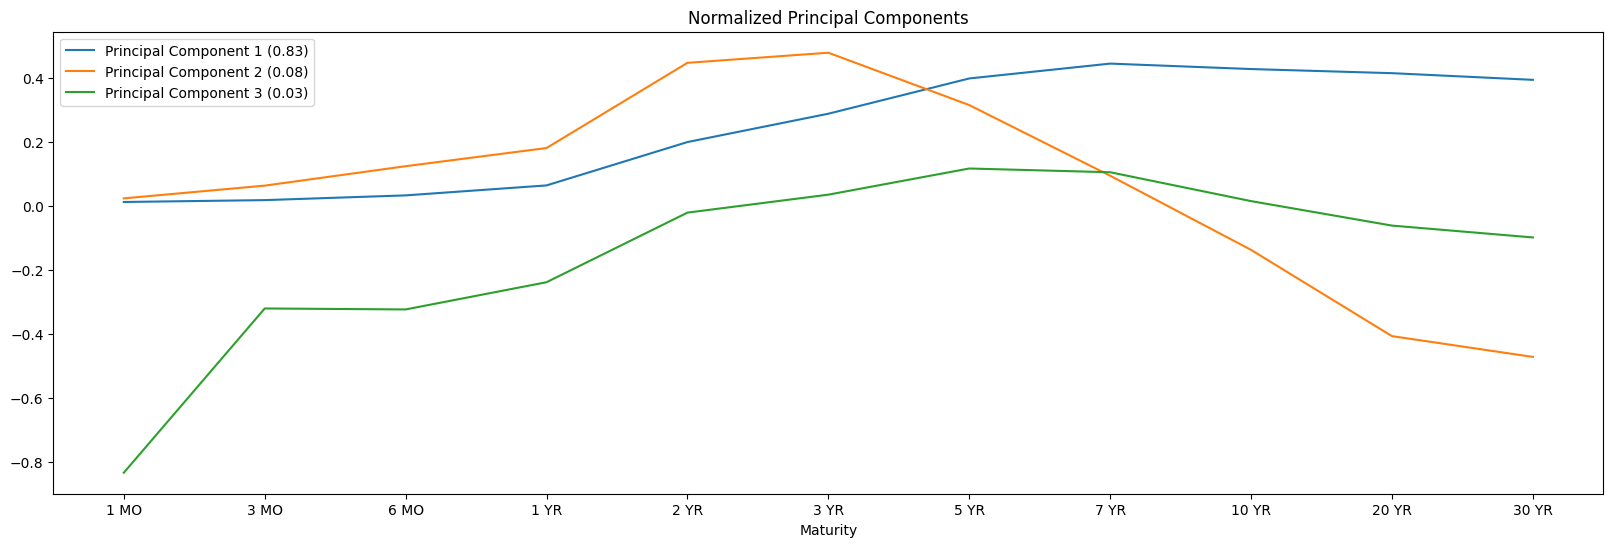

In [314]:
import matplotlib.pyplot as plt

# Define figure size
fig, ax = plt.subplots(figsize=(20, 6))

# Plot each principal component and label with its explained variance ratio
ax.plot(Sample1.columns, pca_model.components_.squeeze()[0].reshape(-1, 1), label=f'Principal Component 1 ({pca_model.explained_variance_ratio_[0]:.2f})')
ax.plot(Sample1.columns, pca_model.components_.squeeze()[1].reshape(-1, 1), label=f'Principal Component 2 ({pca_model.explained_variance_ratio_[1]:.2f})')
ax.plot(Sample1.columns, pca_model.components_.squeeze()[2].reshape(-1, 1), label=f'Principal Component 3 ({pca_model.explained_variance_ratio_[2]:.2f})')

# Set x-axis label and plot title
ax.set_xlabel('Maturity')
ax.set_title('Normalized Principal Components')

# Add legend
ax.legend()


c.	Use this PCA model to analyze the CMT curve move on the 2016 Election Day: 11/8/2016 to 11/9/2016 
- i.	Plot CMT curve move vs the move explained by the first PCA factor, first 2 PCA factors, first 3 PCA factors
- ii.	Explain your calculations and results


In [315]:
params = {
    'api_key': 'ssjLTYPtW7EPob1yJxJE',
    'limit': 100000,
    'start_date': '2016-11-08', 
    'end_date': '2016-11-09'
}

election_data = get_treasury_yield_data(url, params)
election_data


,1 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,
2016-11-08,0.28,0.43,0.56,0.71,0.87,1.04,1.34,1.65,1.88,2.29,2.63
2016-11-09,0.30,0.45,0.56,0.72,0.90,1.12,1.49,1.84,2.07,2.52,2.88


In [316]:
election_data_diffs = election_data.diff().dropna()
election_data_diffs

,1 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,
2016-11-09,0.02,0.02,0.0,0.01,0.03,0.08,0.15,0.19,0.19,0.23,0.25


In [317]:
# Factor loading 
pca_comp_3 = pca_model.components_[:,0:3]
pca_comp_3.shape


(11, 3)

In [318]:
factor = np.dot(pca_comp_3.T, (election_data_diffs.values).T)
factor

array([[ 0.01225213],
       [-0.16161964],
       [ 0.18499444]])

In [319]:
(pca_model.components_).shape

(11, 11)

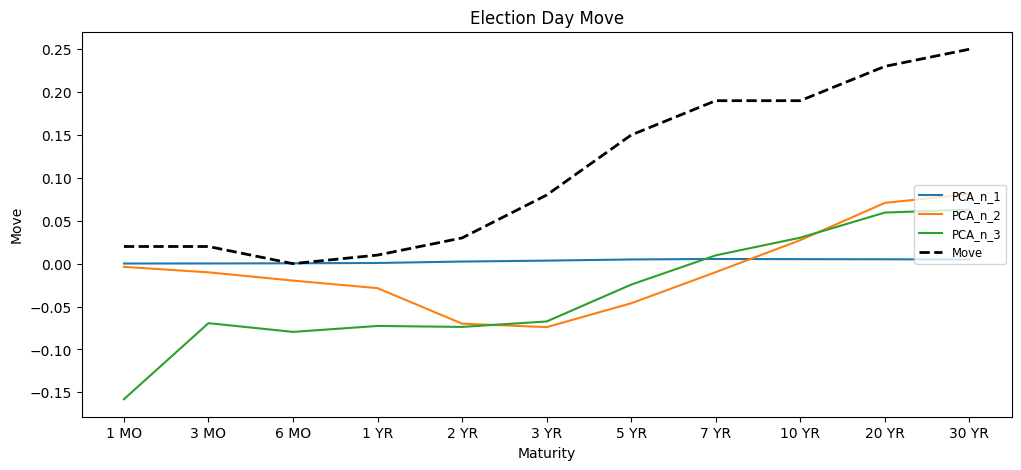

In [320]:
plt.figure(figsize = (12,5))
plt.plot(Sample1.columns, pca_model.components_[0]*factor[0], label = f'PCA_n_1')
plt.plot(Sample1.columns, pca_model.components_[0]*factor[0] + pca_model.components_[1]*factor[1], label = f'PCA_n_2')
plt.plot(Sample1.columns, pca_model.components_[0]*factor[0] + pca_model.components_[1]*factor[1] + pca_model.components_[2]*factor[2], label = f'PCA_n_3')
plt.plot(election_data_diffs.loc['2016-11-09',:] , linestyle = 'dashed', linewidth = 2, color = 'black', label = 'Move')
plt.ylabel('Move')
plt.xlabel('Maturity')
plt.title('Election Day Move')
plt.legend(loc = 'center right', fontsize = 'small')


ii.	Explain your calculations and results

There are three principal components plotted in the figure, each one represented by a different line: PCA_n_1, PCA_n_2, and PCA_n_3. These are obtained from the PCA decomposition of the data, which identifies linear combinations of the original variables that capture the most variation in the data.

The dashed black line indicates the movement in yields on election day.

The figure is helpful to visualize how much of the variation in yield changes is captured by each principal component, and to understand how the different maturities of Treasuries move relative to one another on election day.

From the graph we can observe that :
- PCA-1 explains the move(diff in election_data) mostly.
- PCA-1 and PCA-2 explains the move(diff in election_data) better than only PCA-1.
- PCA-1, PCA-2 and PCA-3 explains the move(diff in election_data) BEST than all others.

Every day, we can get the current level of the factors by doing $F = E^T\times dy$. The dimension of $F$ will be $3 \times 1$, which is what we want.

Calculated the move explained by the  PCA factor is the product of the F and the first three columns in pca_model.components_



d.	Compute weights of the WFLY to make sure that WFLY does not have PCA1,2 risk exposure in Sample1.  Let’s call this combination WFLY1

In [321]:
pca_1_move = pca_model.components_[0]
pca_1_move = pd.Series(pca_1_move, index = election_data.columns)

pca_2_move =  pca_model.components_[1]
pca_2_move = pd.Series(pca_2_move, index = election_data.columns)


In [322]:
#Create a matrix 'a' with PCA1 and PCA2 moves for 3YR and 7YR maturities
a = np.array([[pca_1_move['3 YR'], pca_1_move['7 YR']] , [pca_2_move['3 YR'], pca_2_move['7 YR']]])

#Create a matrix 'b' with the PCA1 and PCA2 moves for 5YR maturity
b = np.array([pca_1_move['5 YR'], pca_2_move['5 YR']]).reshape(-1,1)

#Solve for weights w1 and w2 using the linear system of equations a*w = b
sol = np.linalg.solve(a, b)
w1, w2 = sol[0].squeeze(), sol[1].squeeze()

#Print the values of w1 and w2
print(f'w1 = {w1}')
print(f'w2 = {w2}')

#Store the weights in an array WFLY1
WFLY1 = np.array((float(w1), -1.0, float(w2))).astype(np.float64)

w1 = 0.5521378796341727
w2 = 0.5378254192317362


e.	Choose weights of the WFLY from cointegration analysis (weights correspond to the best cointegrated vector).  Let’s call this combination WFLY2

In [323]:
import statsmodels.api as sm

def cca_Box_Tiao(df):
    df = df-df.mean()
    df_lag = df.shift().dropna()
    df1 = df.loc[df_lag.index, :]
    model = sm.OLS(df1.values, df_lag.values).fit()
    A = model.params
    cov = df1.cov()
    Q = np.linalg.inv(cov)@ (np.transpose(A)) @ (cov) @ (A)
    val, vec = np.linalg.eig(Q)
    return val, vec

In [324]:
legs = ['3 YR', '7 YR']
belly = '5 YR'
flylist = [legs[0],belly, legs[1]]
#l = ['3M','6M','1Y','2Y','3Y','5Y', '7Y','10Y','20Y','30Y']
fly= Sample1.loc[:,flylist]
df1 = fly
#df1 = df[l]
n = len(df1.columns)
val, vec = cca_Box_Tiao(df1)
#print (val)
vec = pd.DataFrame(vec)
#print (vec)
vec = vec.rename(columns=lambda x: n-x-1, inplace=False)
#print (vec)
w = vec[2].values
w_cca_bt = [-w[0]/w[1],-w[2]/w[1]]
w_cca_bt
WFLY2 = [w_cca_bt[0],-1, w_cca_bt[1]]
WFLY2

[0.5328578596791461, -1, 0.6426874359334412]

In [325]:
EignenVal, EigenVector  = cca_Box_Tiao(Sample1[['3 YR', '5 YR', '7 YR']]) 

## 3.	Compute Half-Life & ADF statistic for WFLY2 using Sample1
a.	Note that you are using time series of levels, not daily differences


In [326]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [327]:
WFLY2_df = (WFLY2 * Sample1.loc[:'2013-05-30', ['3 YR', '5 YR', '7 YR']]).sum(axis=1)
#shorting the size since issue with kernel, not able to handle large size
WFLY2_df

Date
2012-10-01    0.213581
2012-10-02    0.217154
2012-10-03    0.210727
2012-10-04    0.228190
2012-10-05    0.230982
                ...   
2013-05-23    0.213563
2013-05-24    0.211807
2013-05-28    0.224412
2013-05-29    0.211558
2013-05-30    0.221558
Length: 164, dtype: float64

In [328]:
result = adfuller(WFLY2_df)
print(f'ADF Test Statistic = {result[0]}')
print(f'P-value = {result[1]}')

ADF Test Statistic = -3.465418096591801
P-value = 0.008920937478242767


In [329]:
result

(-3.465418096591801,
 0.008920937478242767,
 1,
 162,
 {'1%': -3.471374345647024,
  '5%': -2.8795521079291966,
  '10%': -2.5763733302850174},
 -1034.719902411997)

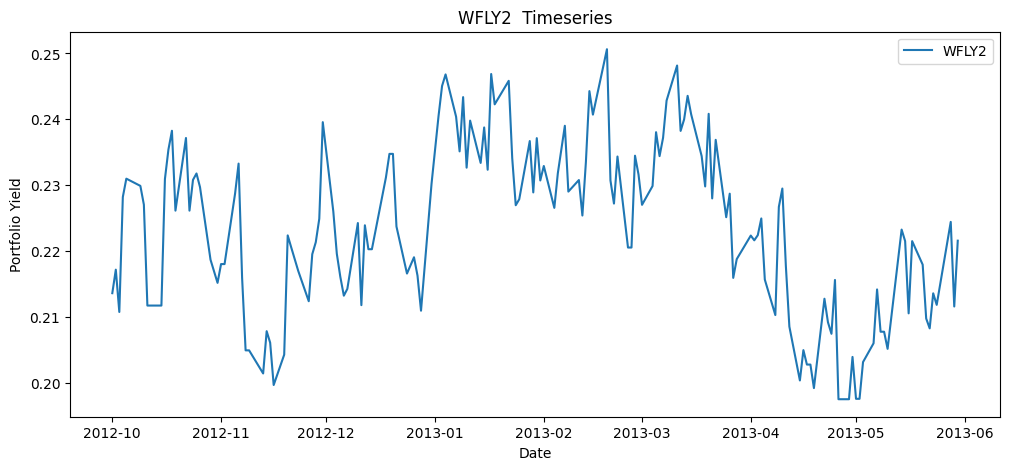

In [330]:
plt.figure(figsize = (12,5))
plt.plot(WFLY2_df, label = 'WFLY2')
plt.title('WFLY2  Timeseries')
plt.xlabel('Date')
plt.ylabel('Portfolio Yield')
plt.legend()

In [331]:
import numpy as np
import statsmodels.api as sm
from math import log

def calculate_half_life(z_array):
    z_lag = np.roll(z_array, 1)
    z_lag[0] = 0
    z_ret = z_array - z_lag
    z_ret[0] = 0
    
    z_lag2 = sm.add_constant(z_lag)
    model = sm.OLS(z_ret, z_lag2)
    res = model.fit()
    
    half_life = -log(2) / res.params[1]
    
    return half_life


In [332]:
calculate_half_life(WFLY2_df)

10.024448617713785

## 4.	Repeat Step #3 out-of-sample: using 3m, 6m out of sample periods
a.	How do out-of-sample results compare across periods and combinations?


In [333]:
url = 'https://data.nasdaq.com/api/v3/datasets/USTREASURY/YIELD/data'
params_3m = {
    'api_key': 'ssjLTYPtW7EPob1yJxJE',
    'limit': 100000,
    'start_date': '2016-10-03', 
    'end_date': '2017-01-03'
}
params_6m = {
    'api_key': 'ssjLTYPtW7EPob1yJxJE',
    'limit': 100000,
    'start_date': '2016-10-03', 
    'end_date': '2017-04-03'
}

out_of_sample_3m = get_treasury_yield_data(url, params_3m)
out_of_sample_6m = get_treasury_yield_data(url, params_6m)

In [334]:
out_of_sample_3m = out_of_sample_3m[['3 YR', '5 YR', '7 YR']]
out_of_sample_6m = out_of_sample_6m[['3 YR', '5 YR', '7 YR']]

In [335]:
out_of_sample_3m

,3 YR,5 YR,7 YR
Date,,,
2016-10-03,0.91,1.18,1.46
2016-10-04,0.95,1.22,1.51
2016-10-05,0.98,1.26,1.54
2016-10-06,1.00,1.28,1.58
2016-10-07,0.99,1.26,1.55
...,...,...,...
2016-12-27,1.58,2.07,2.37
2016-12-28,1.55,2.02,2.32
2016-12-29,1.49,1.96,2.30


In [336]:
oof_3m = (WFLY2 * out_of_sample_3m).sum(axis = 1)
oof_6m = (WFLY2 * out_of_sample_6m).sum(axis = 1)

In [337]:
oof_3m

Date
2016-10-03    0.243224
2016-10-04    0.256673
2016-10-05    0.251939
2016-10-06    0.268304
2016-10-07    0.263695
                ...   
2016-12-27    0.295085
2016-12-28    0.296965
2016-12-29    0.312139
2016-12-30    0.299348
2017-01-03    0.311760
Length: 62, dtype: float64

In [338]:
oof_3m

Date
2016-10-03    0.243224
2016-10-04    0.256673
2016-10-05    0.251939
2016-10-06    0.268304
2016-10-07    0.263695
                ...   
2016-12-27    0.295085
2016-12-28    0.296965
2016-12-29    0.312139
2016-12-30    0.299348
2017-01-03    0.311760
Length: 62, dtype: float64

In [339]:
# adf 3 month
adf_result = adfuller(oof_3m)
print(f'ADF Test Statistic = {adf_result[0]}')
print(f'P-value = {result[1]}')

# adf 6month
adf_result = adfuller(oof_6m)
print(f'ADF Test Statistic = {adf_result[0]}')
print(f'P-value = {result[1]}')

ADF Test Statistic = -1.4636713847501985
P-value = 0.008920937478242767
ADF Test Statistic = -2.493803296267185
P-value = 0.008920937478242767


In [340]:
adf_result

(-2.493803296267185,
 0.11698933913826759,
 1,
 122,
 {'1%': -3.4851223522012855,
  '5%': -2.88553750045158,
  '10%': -2.5795685622144586},
 -719.5557539420876)

<AxesSubplot: xlabel='Date'>

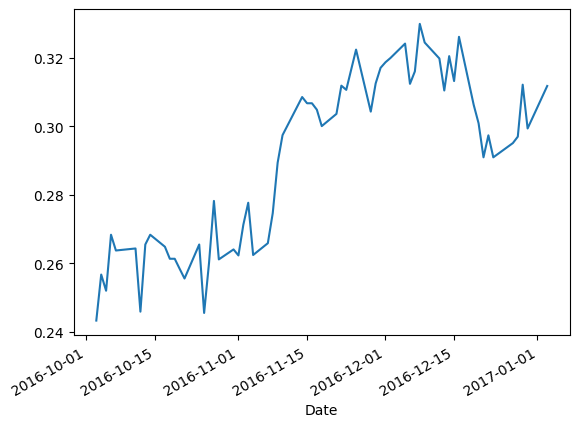

In [341]:
oof_3m.plot()

<AxesSubplot: xlabel='Date'>

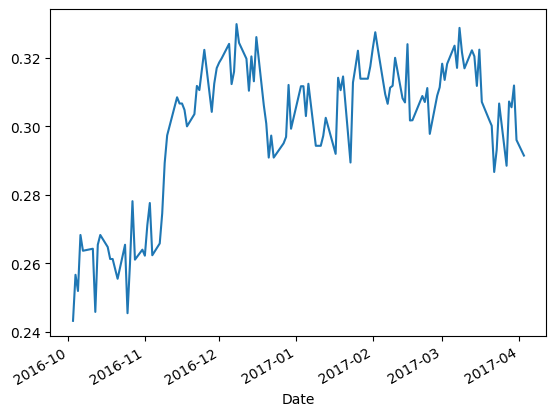

In [342]:
oof_6m.plot()

In [343]:
#half life 3 month
calculate_half_life(oof_3m)


23.69520198791306

In [344]:
#half life 6 month
calculate_half_life(oof_6m)

13.269926441319843

## Independent reading assignment:

What is CCA (Canonical Correlation Analysis)? Find 2 -3 examples independently.
Canonical-correlation analysis (CCA) is a statistical technique that seeks to identify the linear relationships between two sets of variables, X and Y. These variables may be measurements of the same set of individuals or different sets of individuals. CCA finds the linear combinations of X and Y that have maximum correlation with each other.

The resulting canonical variables are linear combinations of the original variables, and the correlation between them is called the canonical correlation. The first canonical variable pair has the largest canonical correlation, and subsequent pairs have decreasing correlations. The number of pairs of canonical variables is limited by the smaller of the number of variables in X and Y.

Examples where CCA is used - 

Psychology: CCA has been used to explore the relationship between personality traits and academic achievement. For example, a study may measure a set of personality traits (such as extraversion, openness to experience, and conscientiousness) and a set of academic achievement measures (such as grades in different subjects). CCA can help identify the underlying latent variables that explain the observed correlations between these two sets of variables.

Social Sciences: CCA has been used to study the relationship between demographic variables and consumer behavior. For example, a study may measure a set of demographic variables (such as age, gender, income, and education) and a set of consumer behavior measures (such as brand loyalty, purchase frequency, and product preferences). CCA can help identify the underlying factors that explain the observed correlations between these two sets of variables.

Biology: CCA has been used to study the relationship between gene expression data and clinical outcomes in cancer patients. For example, a study may measure a set of gene expression data (such as levels of different messenger RNAs) and a set of clinical outcomes (such as response to treatment, survival time, and tumor size). CCA can help identify the underlying biological pathways that explain the observed correlations between these two sets of variables.